In [86]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import networkx as nx
import pylab

In [55]:
nodes = pd.read_csv('cleaned_top_ingreds.csv')
nodes = nodes.drop('Unnamed: 0', axis=1)
edges = pd.read_csv('filtered_pairs.csv')
edges = edges.drop('Unnamed: 0', axis=1)

In [56]:
print(nodes.shape, edges.shape)

(196, 3) (17833, 4)


In [57]:
edges.head()

,pairs,counts,ingred1,ingred2
0,"('all-purpose flour', 'almond')",657,all-purpose flour,almond
1,"('all-purpose flour', 'almond extract')",634,all-purpose flour,almond extract
2,"('all-purpose flour', 'apple')",356,all-purpose flour,apple
3,"('all-purpose flour', 'avocado')",53,all-purpose flour,avocado
4,"('all-purpose flour', 'bacon')",411,all-purpose flour,bacon


In [58]:
edges.groupby('ingred1').agg({'counts':'sum'}).join(edges.groupby('ingred2').agg({'counts':'sum'}), lsuffix='1', rsuffix='2').fillna(0)

,counts1,counts2
ingred1,,
all-purpose flour,174402,0.0
almond,13679,713.0
almond extract,7040,894.0
apple,6823,424.0
avocado,8845,157.0
bacon,15531,519.0
baking powder,61186,7509.0
baking soda,47410,8608.0
balsamic vinegar,16520,374.0


In [59]:
len(list(set(list(edges['ingred1'].unique()) + list(edges['ingred2'].unique()))))

196

In [64]:
G = nx.Graph()

In [67]:
# Add edges and edge attributes
for i, elrow in edges.iterrows():
    G.add_edge(elrow[2], elrow[3], attr_dict=elrow[0:2].to_dict())

In [72]:
# Add node attributes
for i, nlrow in nodes.iterrows():
    G.add_node(nlrow['ingredient'], attr_dict=nlrow[1:].to_dict())

In [78]:
G.nodes()

NodeView(('butter', 'garlic', 'sugar', 'olive oil', 'egg', 'all-purpose flour', 'onion', 'vanilla extract', 'vegetable oil', 'lemon juice', 'brown sugar', 'chicken stock', 'parsley', 'milk', 'cilantro', 'baking powder', 'ground cinnamon', 'carrot', 'heavy cream', 'red onion', 'baking soda', 'parmesan', 'bay leaf', 'shallot', 'wine vinegar', 'thyme', 'honey', 'lemon', 'soy sauce', 'celery', 'tomato', 'canola oil', 'sour cream', 'white wine', 'ground cumin', 'egg yolk', 'ginger', 'basil', 'lime juice', 'dijon mustard', 'confectioner sugar', 'green onion', 'scallion', 'mayonnaise', 'red bell', 'paprika', 'cornstarch', 'worcestershire sauce', 'whole milk', 'chicken breast', 'garlic powder', 'lime', 'egg white', 'lemon zest', 'chili powder', 'cream cheese', 'dried oregano', 'flour', 'orange juice', 'ground nutmeg', 'bread crumb', 'tomato paste', 'cider vinegar', 'cocoa powder', 'buttermilk', 'walnut', 'sesame oil', 'balsamic vinegar', 'mint', 'ground beef', 'ground ginger', 'hot sauce', 'po

/Applications/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


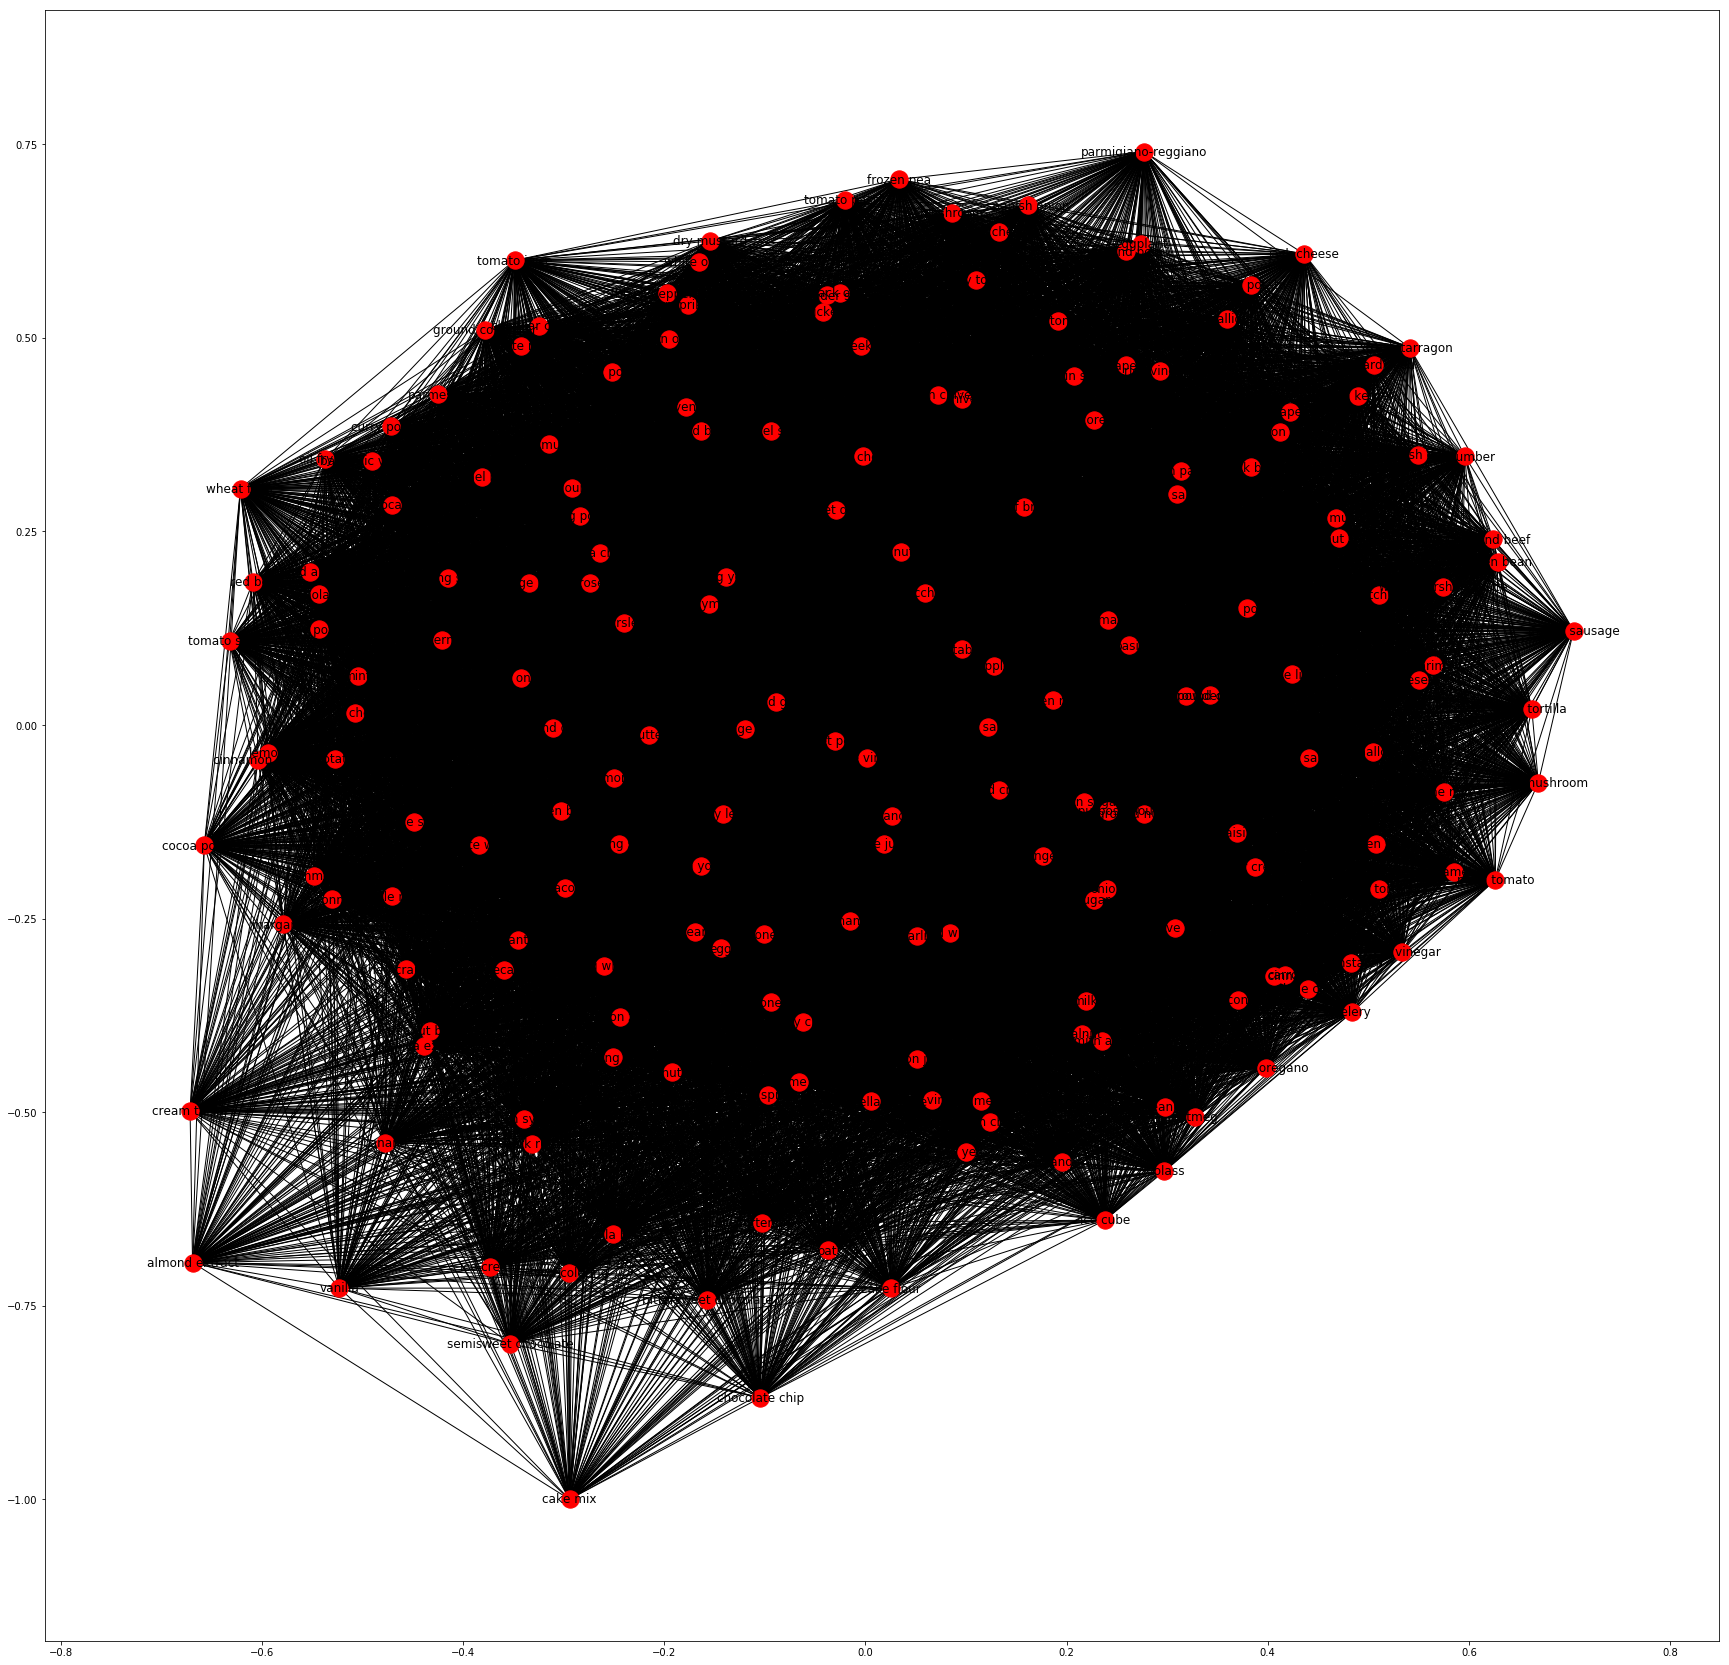

In [84]:
plt.figure(figsize=(30,30))
nx.draw_networkx(G)

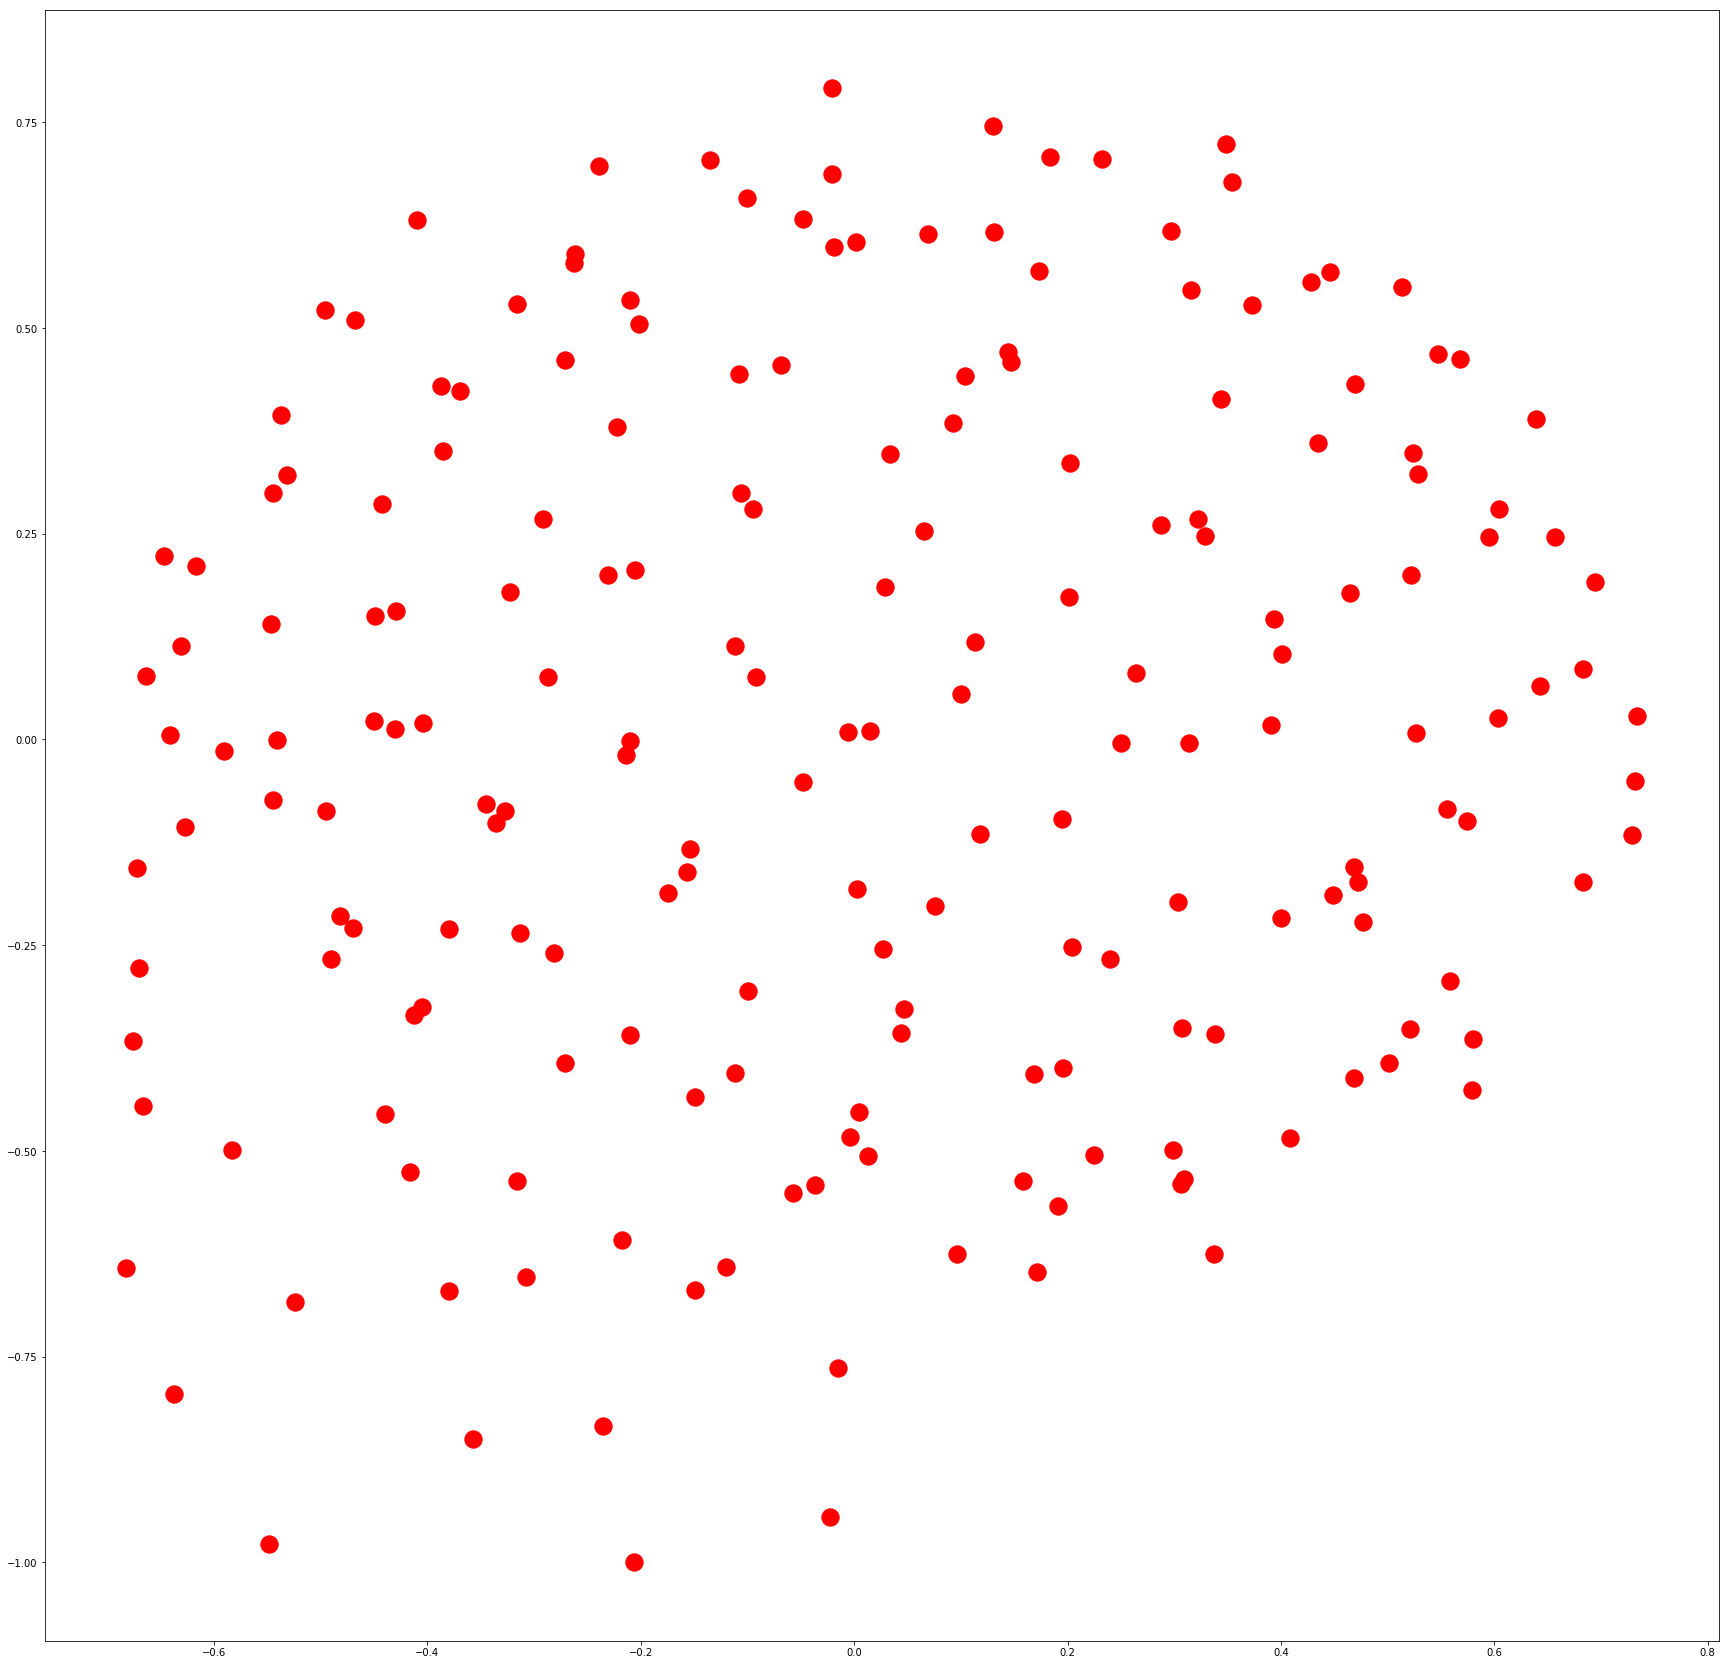

In [97]:
plt.figure(figsize=(30,30))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)